In [1]:
import struct
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#https://medium.com/@mannasiladittya/converting-mnist-data-in-idx-format-to-python-numpy-array-5cb9126f99f1

In [5]:
filename = {'images' : 'augumentation/data/train-images.idx3-ubyte' ,'labels' : 'augumentation/data/train-labels.idx1-ubyte'}

In [346]:
# train_imagesfile = open(filename['images'],'rb')
# train_labels = open(filename['labels'],'rb')

# # images
# magic_bytes = train_imagesfile.read(4)
# n_imgs_bytes = train_imagesfile.read(4)
# n_row_bytes = train_imagesfile.read(4)
# n_col_bytes = train_imagesfile.read(4)

# # labels
# magic_bytes_lbls = train_labels.read(4)
# imgs_bytes_lbls = train_labels.read(4)

# # images
# magic = struct.unpack('>4B',magic_bytes)
# n_imgs = struct.unpack('>I',n_imgs_bytes)[0]
# n_rows = struct.unpack('>I',n_row_bytes)[0] 
# n_cols = struct.unpack('>I',n_col_bytes)[0]

# # labels
# magic_lbls = struct.unpack('>4B',magic_bytes_lbls)
# n_imgs_lbls = struct.unpack('>I',imgs_bytes_lbls)[0]

# # Type of data and n of dimensions
# print(magic[2], magic[3])
# # n of images
# print(n_imgs)
# # image pixel height and width
# print(n_rows, n_cols)

# # Type of data and n of dimensions of labels
# print(magic_lbls[2], magic_lbls[3])

# n_total_pixel_bytes = n_imgs*n_rows*n_cols

# pixel_bytes = train_imagesfile.read(n_total_pixel_bytes)
# label_bytes = train_labels.read(n_imgs)

# pixel_values = struct.unpack('>'+'B'*n_total_pixel_bytes, pixel_bytes)
# label_values = struct.unpack('>'+'B'*n_imgs, label_bytes)

# pixel_values_as_mtrx = np.asarray(pixel_values).reshape((n_imgs,n_rows,n_cols))
# images_ndarray = pixel_values_as_mtrx

# images_rescaled = images_ndarray / 255


# Column changes first, when col = 28 then row changes
#(0,1) ------ (0,28)
#(1,1) ------ (1,28)

# pixel_pos = 265

# print(pixel_values[260:270])

# # img number
# print(np.floor(pixel_pos / (28*28)))

# # number of rows of 28 pixels before this pixel = row number
# print(np.floor(pixel_pos / 28))

# # column number
# print(pixel_pos % 28)

# # rebuilding pixel
# print(pixel_values_as_mtrx[0][9][13])

In [1289]:
np.random.seed(0)

In [1290]:
digits = [3,7,8,6]

In [1291]:
with open(filename['images'], 'rb') as train_imagesfile:
    info_bytes = train_imagesfile.read(16)
    (n_imgs, n_rows, n_cols) = (struct.unpack('>I', info_bytes[4:8])[0], struct.unpack('>I', info_bytes[8:12])[0], struct.unpack('>I', info_bytes[12:16])[0])
    pixel_bytes = train_imagesfile.read(n_imgs * n_rows * n_cols)
    images_ndarray = np.asarray(
    struct.unpack('>' + 'B' * (n_imgs * n_rows * n_cols), pixel_bytes)).reshape((n_imgs, n_rows, n_cols)
)
# labels
with open(filename['labels'], 'rb') as train_labels:
    info_bytes = train_labels.read(8)
    n_imgs_lbls = struct.unpack('>I',info_bytes[4:8])[0]
    label_values = np.array(struct.unpack('>'+'B'*n_imgs, train_labels.read(n_imgs_lbls)))


[26403, 25095, 17194, 32977]


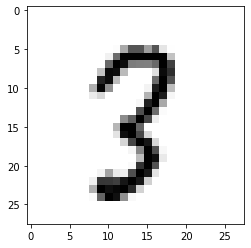

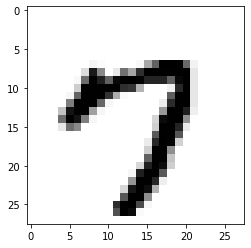

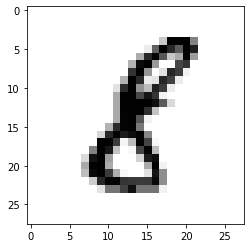

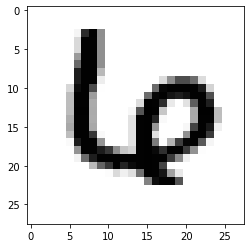

In [1292]:
digit_selection_ixs = [np.random.choice(np.where(labels_npy == x)[0], 1)[0] for x in digits]
print(digit_selection_ixs)

selected_images = images_rescaled[digit_selection_ixs]

for image in selected_images:   
    plt.imshow((1 - image), cmap="gray")
    plt.show()

In [1293]:
# Spacing
n_digits = len(digits)

In [1294]:
spacing_options = list(permutations_w_constraints(n_digits-1, 6, 1, 4))
print(spacing_options)

[(1, 1, 4), (1, 2, 3), (1, 3, 2), (1, 4, 1), (2, 1, 3), (2, 2, 2), (2, 3, 1), (3, 1, 2), (3, 2, 1), (4, 1, 1)]


In [1295]:
spaces = spacing_options[np.random.choice(len(spacing_options),1)[0]]
spaces

(1, 4, 1)

In [1296]:
spaces_matrix = []
for i in range(len(spaces)):
    spaces_matrix.append(np.zeros(28 * spaces[i], dtype='float32').reshape(28, spaces[i]))

In [1299]:
stacked_images = selected_images[0]
for i in range(1, n_digits):
    stacked_images = np.hstack([stacked_images, spaces_matrix[i-1],selected_images[i]])

In [1300]:
stacked_images.shape

(28, 118)

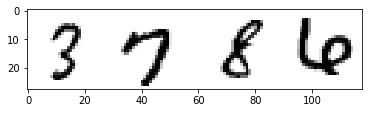

In [1301]:
plt.imshow((255 - stacked_images), cmap="gray")
plt.show()

In [1302]:
stacked_images[15][12]

0.996078431372549

In [1303]:
np.save('stacked_digits.npy', stacked_images)

In [1304]:
stacked_images[10][15]

0.047058823529411764

### Dirilecth distribution approach + greedy search

In [526]:
n=10
spacing_range = (2, 7)
width = 320

space_options = list(range(spacing_range[0], spacing_range[1]+1))
numbers_to_generate = [3, 9, 1, 3, 7, 6, 2, 8, 7, 4]

character_req_space = 28 * len(numbers_to_generate)
character_spacing_sum = width - character_req_space

In [ ]:
%%timeit
search = True
while search:
    spaces = np.random.dirichlet(np.ones(len(numbers_to_generate)), 1) * (character_spacing_sum)[0]
    round_spaces = np.around(spaces)
    check_bounds = [True if (x >= spacing_range[0]) and (x <= spacing_range[1]) else False for x in spaces[0]]
    if all(check_bounds):
        search = False

In [548]:
search = True
while search:
    spaces = np.random.dirichlet(np.ones(len(numbers_to_generate)), 1) * (character_spacing_sum)
    round_spaces = np.around(spaces[0])
    check_bounds = [True if (x >= spacing_range[0]) and (x <= spacing_range[1]) else False for x in round_spaces]
    if all(check_bounds):
        search = False

### Greedy approach

In [2]:
import struct
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [700]:
from functools import lru_cache

In [709]:
image_width = 120
#image_width = 290
digits = [3, 7, 2, 8]
#digits = [3, 7, 8, 6, 9, 1, 1, 2, 3]
space_ranges = (1,2)

n_digits = len(digits)
available_space = (image_width - n_digits * 28)

# space between numbers MUST be INT. No half pixels possible
space_between_numbers = available_space / (n_digits - 1)

spaces_to_assign = n_digits - 1

print(n_digits)
print(spaces_to_assign)
print(available_space)
print(space_between_numbers)

4
3
8
2.6666666666666665


In [840]:
####### LOOKING FOR AN EFFECTIVE RECURSION

max_value = 4
min_value = 2

def sums(spaces_to_assign, total_sum):
    if spaces_to_assign == 1:
        if (total_sum <= max_value) & (total_sum >= min_value):
            yield (total_sum,)
    else:
        for value in range(min_val, max_value + 1):
            for permutation in sums(spaces_to_assign - 1, total_sum - value):
                yield (value,) + permutation
                
# [for value in range 2 - 5]
#### with value = 4
# for permutation in sum(2, 4) -- (8-4)

    # sum(2, 4):
    # go to else
    # for value in range 2 - 5

        #### with value = 2
        # for permutation in sum(1, 2) -- (4-2)
        # sum(1, 2):
        # go to length == 1:
        #### yield (2,)
        # (2,) yielded onto result of sum(1, 2) ---> permutation
        # (value,) + permutation = (2,) + (2,) = (2,2)
        # (2,2) yielded onto result of sum(2, 4) ---> permutation
        # (value,) + permutation = (4,) + (2,2) = (4,2,2) 
        # VALUE

        # ... 

        # with value = 4
        # for permutation in sum(1, 0) -- (4-4)
        # sum(1, 0):
        # go to length == 1:
        # yield (0,)
        # (0,) yielded onto result of sum(1, 0) ---> permutation
        # (value,) + permutation = (4,) + (0,) = (4,0)
        # (4,0) yielded onto result of sum(2, 4) ---> permutation
        # (value,) + permutation = (4,) + (4,0) = (4,4,0) 

In [842]:
results = list(sums(3, 10))

results

[(2, 4, 4), (3, 3, 4), (3, 4, 3), (4, 2, 4), (4, 3, 3), (4, 4, 2)]

In [1082]:
#@lru_cache(maxsize=10000)
def permutations_w_constraints(n_perm_elements, sum_total, min_value, max_value):
    # base case
    if n_perm_elements == 1:
        if (sum_total <= max_value) & (sum_total >= min_value):
            yield (sum_total,)
    else:
        for value in range(min_value, max_value + 1):
            for permutation in permutations_w_constraints(
                n_perm_elements - 1, sum_total - value,  min_value, max_value
            ):
                yield (value,) + permutation

In [1068]:
# digits
n_digits = 10
# possible space values
space_options = 5

In [1077]:
results = list(permutations_w_constraints(n_digits, 40, 1, space_options))

In [1081]:
results[0]

(1, 1, 3, 5, 5, 5, 5, 5, 5, 5)

In [1063]:
results[-1]

(5, 5, 5, 5, 5, 5, 5, 3, 1, 1)

In [117]:
from scipy.stats import chisquare, kstest, uniform
import numpy as np

In [14]:
from augmentation.sequence_generators import NumberSequenceGenerator

In [44]:
digits = [1,3,7,6,2]
spacing_range = (3, 7)
image_width = 155

In [45]:
nsg = NumberSequenceGenerator(spacing_method='random_selection')

In [46]:
mnist_digit_sequence = nsg.generate_numbers_sequence(digits, spacing_range, image_width)

In [137]:
result = []
for i in range(3000):
    for space in nsg._calculate_digit_spacing(len(digits), 15, spacing_range):
        result.append(space.shape[1])

In [142]:
normed_result = [x / max(result) for x in result]

In [133]:
r = uniform.rvs(size=5000)

In [134]:
r[0:10]

array([0.69845453, 0.8408143 , 0.08991954, 0.19349586, 0.81692744,
       0.31598858, 0.28021647, 0.22857002, 0.07349971, 0.29655278])

In [135]:
kstest(r, 'uniform')

KstestResult(statistic=0.011414930489869302, pvalue=0.5325422768871001)

In [144]:
kstest(normed_result, 'uniform')

KstestResult(statistic=0.5, pvalue=0.0)

In [148]:
kstest(r, 'norm')

KstestResult(statistic=0.5000139062279947, pvalue=0.0)

/Users/nicolassandller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([0.96031335, 1.05634468, 1.00632836, 1.04033946, 0.97631857,
        1.04033946, 1.02833554, 0.9243016 , 0.9663153 , 1.00432771]),
 array([3.48577443e-05, 1.00002228e-01, 1.99969599e-01, 2.99936969e-01,
        3.99904339e-01, 4.99871710e-01, 5.99839080e-01, 6.99806450e-01,
        7.99773821e-01, 8.99741191e-01, 9.99708562e-01]),
 <a list of 1 Patch objects>)

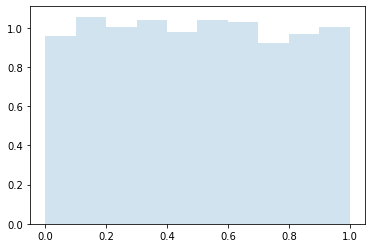

In [149]:
plt.hist(r, normed=True, histtype='stepfilled', alpha=0.2)

/Users/nicolassandller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([10.00166667,  0.        ,  0.        ,  5.98833333,  0.        ,
         0.        ,  3.01833333,  0.        ,  0.        ,  0.99166667]),
 array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 1 Patch objects>)

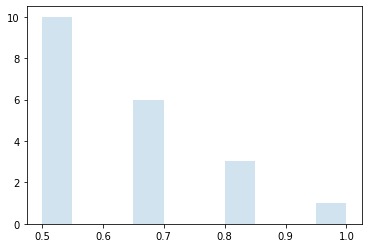

In [151]:
plt.hist(normed_result, normed=True, histtype='stepfilled', alpha=0.2)